# Домашнее задание 1
## Sentiment Analysis in English

*deadline*: 1 октября 2023, 23:59

В этом домашнем задании вы будете работать с корпусом новостных текстов на английском языке. Корпус собран из заметок новостных сайтов с указанием на тональность данного текста.

Корпус описан и представлен по ссылке: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Части 1, 2 задания должны быть выполнены на полных текстах, Часть 3 – на разбиении на тестовое, отладочное и обучающее множества (которое вы должно произвести самостоятельно). Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров.


## ПРАВИЛА
1. Домашнее задание выполняется в группе до 4-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо jupyter-тетрадке.
3. Отчет должен содержать: имена всех членов группы, нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросовестное цитирование приводит к обнулению оценки.
7. За каждую неделю просрочки после дедлайна начисляет по 1 штрафному баллу (например, при дедлайне 01.10.23 в 23:59 сдача ДЗ 12.10.22 ведёт к 2 штрафным баллам).
8. Бонусные баллы позволяют повысить общую оценку за ДЗ до максимальной (если были ошибки или недочеты, повлекшие снижение баллов).


## Часть 1. [2 балла] Эксплоративный анализ
1. Найдите топ-300 слов по частоте без учета стоп-слов.
2. Найдите топ слов, характеризующих каждую тональность отдельно.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для данной темы)

## Часть 2. [2 балла] Модели представления слов
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели.
2. Визуализируйте топ-300 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: каждая новостная статья описывает какую-то ситуацию, имеющую определенную тональность. Требуется по тексту предсказать, какую тональность имеет данная статья. Таким образом, тональность - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на каждом из классв. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом текстов?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов.

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling.
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 300-500 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Обобщите все полученные вами результаты и сделайте выводы.

### Данные
Сырые тексты

In [ ]:
!unzip archive.zip

train, test, dev файлы

In [4]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


In [7]:
df.iloc[0]['review']

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Как использовать WordNet из nltk?

In [8]:
# скачиваем WordNet
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
# слово -> множество синсетов (синонимов разных смыслов исходного слова)
from nltk.corpus import wordnet as wn
wn.synsets('magic')

[Synset('magic.n.01'), Synset('magic_trick.n.01'), Synset('charming.s.02')]

In [10]:
# посмотрим, что внутри одного синсета
wn.synsets('magic')[1].lemmas()[0]

Lemma('magic_trick.n.01.magic_trick')

In [11]:
# возьмем лемму одного из слов из синсета
wn.synsets('magic')[1].lemmas()[-1].name()

'deception'

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.tokenize import word_tokenize

# Preprocessing the text data
def preprocess_text(text):
    # Tokenize and remove non-alphanumeric characters
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

# Apply preprocessing to the text column
# Note: Replace 'text_column_name' with the actual name of the text column in your dataset.
df['processed_text'] = df['review'].apply(preprocess_text)

In [16]:
# Calculate word frequencies
all_words = [word for text in df['processed_text'] for word in text]
word_freq = Counter(all_words)

# Identify top 300 words
top_words = word_freq.most_common(300)

# Display top 10 words as a check
top_words[:10]

[('br', 201951),
 ('movie', 85070),
 ('film', 76919),
 ('one', 51828),
 ('like', 39183),
 ('good', 28767),
 ('would', 26475),
 ('even', 24780),
 ('time', 23481),
 ('really', 23024)]

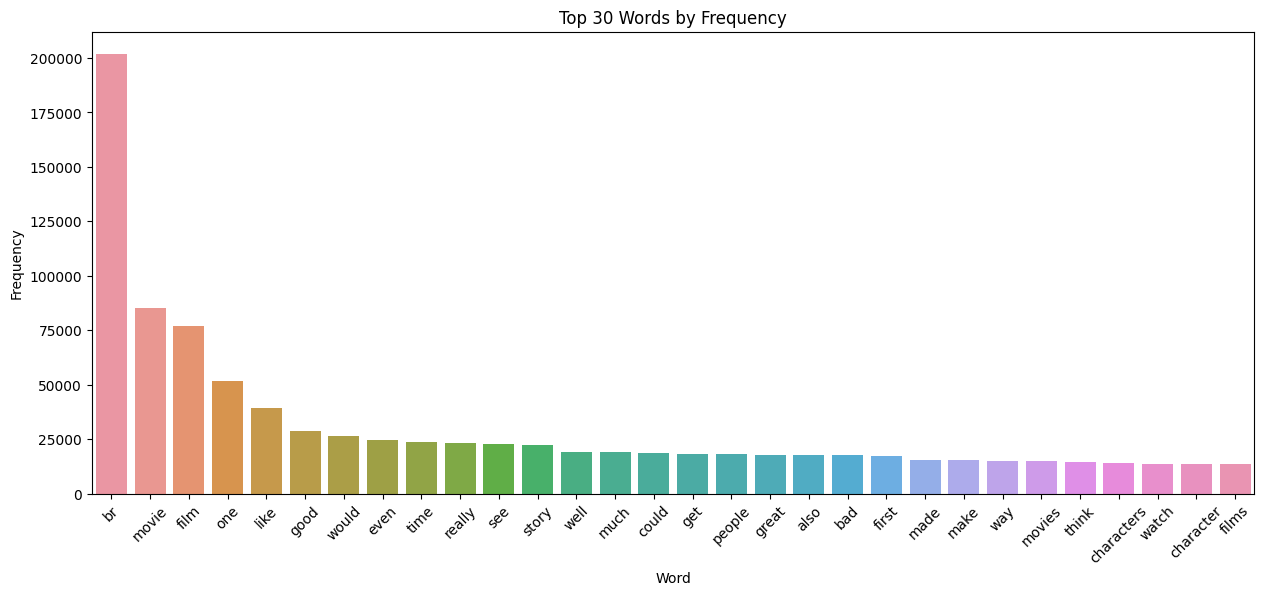

In [17]:
# Visualize the top words
top_words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])
plt.figure(figsize=(15, 6))
sns.barplot(x='word', y='frequency', data=top_words_df.head(30))
plt.xticks(rotation=45)
plt.title('Top 30 Words by Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Group data by sentiment and calculate word frequencies
# Note: Replace 'sentiment_column_name' with the actual name of the sentiment column in your dataset.

def get_top_words_per_sentiment(data, sentiment_column, num_words=10):
    sentiments = data[sentiment_column].unique()
    top_words_per_sentiment = {}

    for sentiment in sentiments:
        sentiment_data = data[data[sentiment_column] == sentiment]
        all_words_sentiment = [word for text in sentiment_data['processed_text'] for word in text]
        word_freq_sentiment = Counter(all_words_sentiment)
        top_words_sentiment = word_freq_sentiment.most_common(num_words)
        top_words_per_sentiment[sentiment] = top_words_sentiment

    return top_words_per_sentiment

# Get top words per sentiment
# Note: Replace 'sentiment_column_name' with the actual name of the sentiment column in your dataset.
top_words_per_sentiment = get_top_words_per_sentiment(df, 'sentiment', num_words=10)

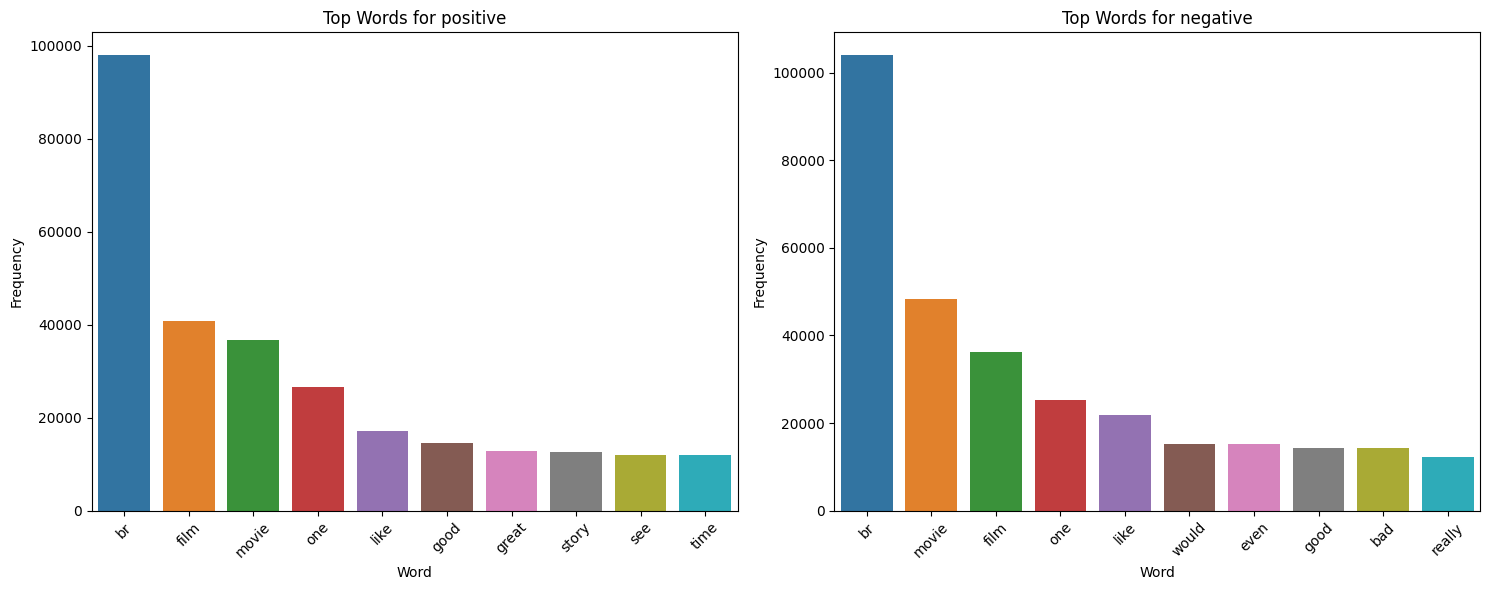

In [19]:
# Visualize top words per sentiment
plt.figure(figsize=(15, 6))

for i, (sentiment, top_words) in enumerate(top_words_per_sentiment.items()):
    plt.subplot(1, len(top_words_per_sentiment), i+1)
    top_words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])
    sns.barplot(x='word', y='frequency', data=top_words_df)
    plt.xticks(rotation=45)
    plt.title(f'Top Words for {sentiment}')
    plt.xlabel('Word')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
!pip install -q gensim --upgrade

import gensim
from gensim.models import Word2Vec

In [24]:
# Train Word2Vec Model
model = Word2Vec(sentences=df['processed_text'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

In [26]:
# Load the model
model = Word2Vec.load("word2vec.model")

# Find synonyms for a word
# Note: Replace 'example_word' with a word from your corpus.
synonyms = model.wv.most_similar('movie', topn=5)

# Find associations (words that appear in a similar context)
# Note: Replace 'example_word' with a word from your corpus.
# Using vocab.keys() instead of index_to_key
associations = model.wv.most_similar_to_given('movie', list(model.wv.index_to_key))

# Find the word that doesn't belong to the list
# Note: Replace 'example_word_1', 'example_word_2', etc. with words from your corpus.
odd_one_out = model.wv.doesnt_match(['time', 'good', 'great'])

# Display results
print(f"Synonyms for 'movie': {synonyms[:3]}")
print(f"Words associated with 'movie': {associations[:5]}")
print(f"The word that doesn't belong to the list: {odd_one_out}")

Synonyms for 'movie': [('film', 0.841002345085144), ('flick', 0.6658779382705688), ('movies', 0.6336356997489929)]
Words associated with 'movie': movie
The word that doesn't belong to the list: time


In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import numpy as np  # Ensure NumPy is imported

# Extract top 300 words and their vectors
top_words = [word for word, freq in Counter(all_words).most_common(300)]
top_words_vectors = np.array([model.wv[word] for word in top_words])  # Convert to NumPy array

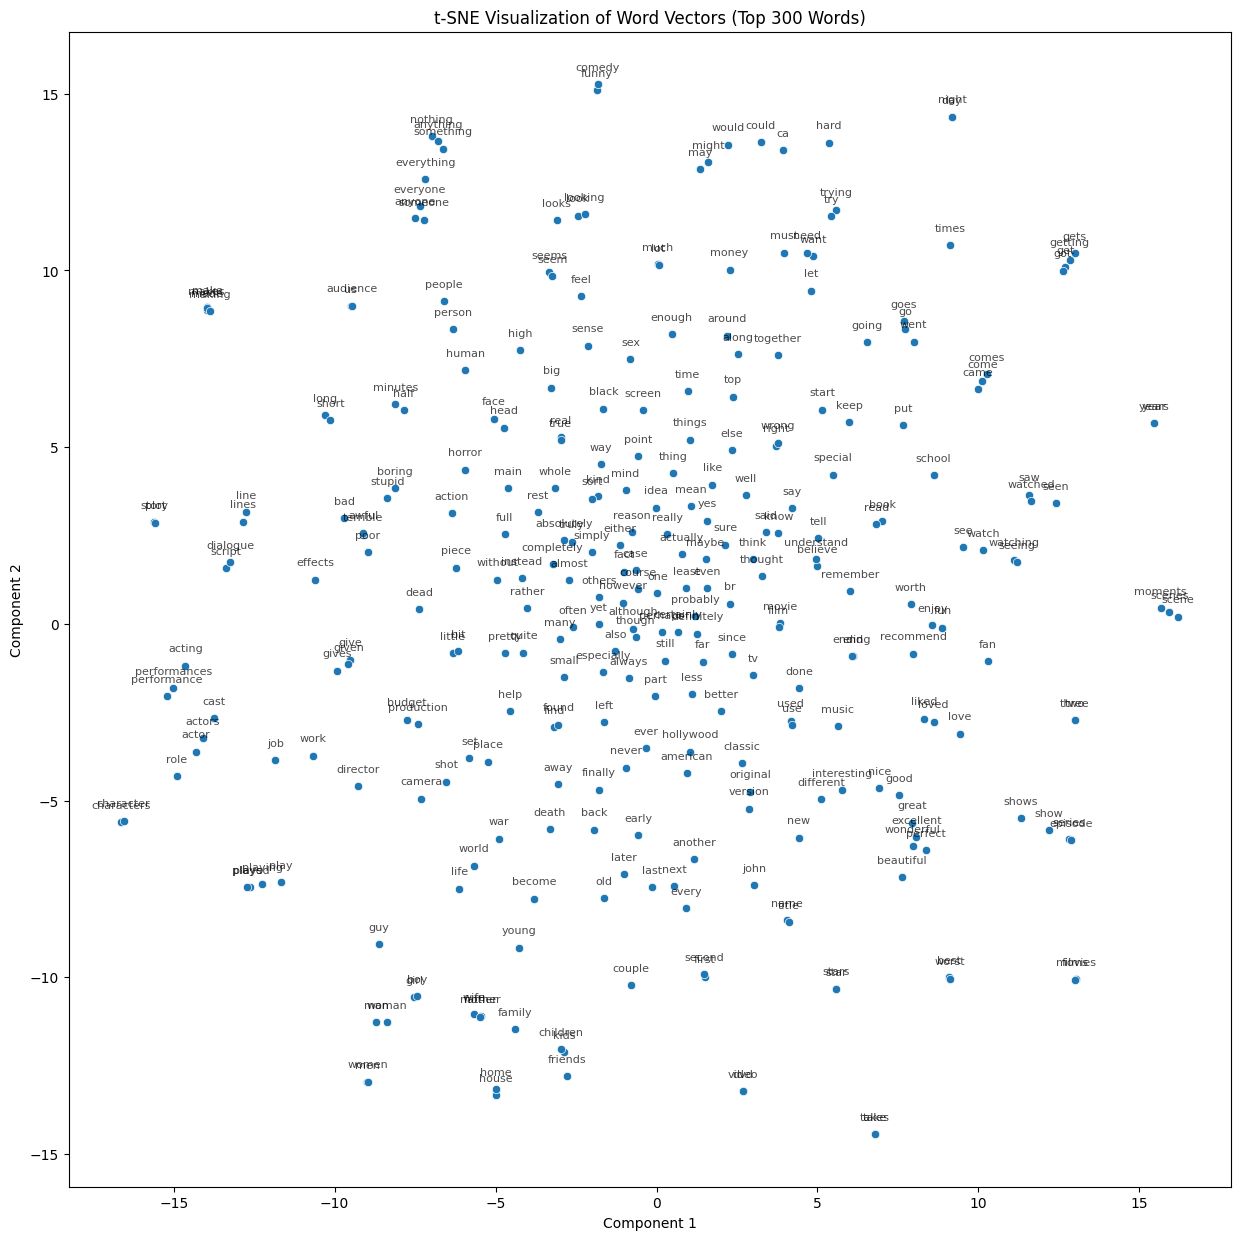

In [29]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors_tsne = tsne.fit_transform(top_words_vectors)  # Now using a NumPy array

# Create a DataFrame for easy plotting
df_tsne = pd.DataFrame(reduced_vectors_tsne, columns=['x', 'y'])
df_tsne['word'] = top_words

# Visualization using seaborn
plt.figure(figsize=(15, 15))
sns.scatterplot(x='x', y='y', data=df_tsne)
for i, word in enumerate(df_tsne['word']):
    plt.annotate(word, (df_tsne['x'].iloc[i], df_tsne['y'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, alpha=0.7)
plt.title('t-SNE Visualization of Word Vectors (Top 300 Words)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [30]:
!pip install -q fasttext

import fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [31]:
def prepare_fasttext_data(data, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for text, label in zip(data['processed_text'], data['sentiment']):
            # Ensure text and label are non-empty/NaN and write to file
            if text and pd.notna(label):
                f.write(f"__label__{label} {' '.join(text)}\n")

# Splitting the data into training and validation sets
train_data = df.sample(frac=0.8, random_state=1)
valid_data = df.drop(train_data.index)

# Preparing training and validation data files
prepare_fasttext_data(train_data, 'train.txt')
prepare_fasttext_data(valid_data, 'valid.txt')

In [41]:
# Training the fastText classifier
model = fasttext.train_supervised(input='train.txt', epoch=1, lr=0.0001, wordNgrams=5, verbose=2, minCount=1)

# Evaluating the model on validation data
valid_result = model.test('valid.txt')
valid_accuracy = valid_result[1] if valid_result[2] != 0 else 0  # Avoid nan

print(f"Validation Accuracy: {valid_accuracy:.2f}")

Validation Accuracy: 0.54


In [42]:
from sklearn.metrics import f1_score

# Predicting labels for validation data
valid_pred = []
for text in valid_data['processed_text'].apply(' '.join):
    prediction = model.predict(text)[0]
    # Ensure prediction is non-empty and extract label
    valid_pred.append(prediction[0].replace('__label__', '') if prediction else '')
valid_true = valid_data['sentiment'].values

# Calculating F1 Score
macro_f1 = f1_score(valid_true, valid_pred, average='macro')

print(f"Macro F1 Score: {macro_f1:.2f}")

Macro F1 Score: 0.44
